<a href="https://colab.research.google.com/github/hessandrea/notebooks/blob/master/Planetscope_TOAreflectance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install rasterio
import rasterio
import numpy as np
import os

In [357]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [360]:
folders = os.listdir ("/content/drive/My Drive/PlanetScope")
folders[0]




'299857_3744205_2016-11-21_0e14'

In [361]:
if len("/content/drive/My Drive/PlanetScope") > 1:
    SearchDirectory = "/content/drive/My Drive/PlanetScope"
    print("I'm looking for tifs in ", SearchDirectory)
else:
    print("Please tell me the directory to look in")
    sys.exit()





I'm looking for tifs in  /content/drive/My Drive/PlanetScope


In [364]:
### this works, don't mess with it
SearchDirectory = "/content/drive/My Drive/PlanetScope"
for root, dirs, files in os.walk(SearchDirectory):
    image_files = []
    for file in files:
        if file.endswith(("BGRN_Analytic.tif")):
            print("Discovered this tif:", os.path.join(root, file))
            image_files.append(os.path.join(root, file))
        if file.endswith(("metadata.xml")):
            print("Discovered this xml:", os.path.join(root, file))
            image_files.append(os.path.join(root, file))

#print(image_files)
#print(os.path.basename(root))

Discovered this xml: /content/drive/My Drive/PlanetScope/299857_3744205_2016-11-21_0e14/299857_3744205_2016-11-21_0e14_BGRN_Analytic_metadata.xml
Discovered this tif: /content/drive/My Drive/PlanetScope/299857_3744205_2016-11-21_0e14/299857_3744205_2016-11-21_0e14_BGRN_Analytic.tif
Discovered this xml: /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic_metadata.xml
Discovered this tif: /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif


In [446]:
import os
rootdir = "/content/drive/My Drive/PlanetScope"


for dir in os.listdir(rootdir):
    #dirs[:] = [d for d in dirs if not d.endsswith('Scope')] # remove some subdirs

    print("dir is: ", dir)
    print("subdir is: ", subdir)

    for file in files:
        #print(os.path.join(subdir, file))
        if file.endswith(("BGRN_Analytic.tif")):
            #print("Discovered this tif:", os.path.join(root, file))
            tiffile = os.path.join(root, file)
        if file.endswith(("metadata.xml")):
            #print("Discovered this xml:", os.path.join(root, file))
            xmlfile = os.path.join(root, file)
    print("tif file is: ", tiffile)
    #print(xmlfile)
    refl_file_string = (subdir + "/" + subdir[-30:] + "_refl.tif")
    refl_file = os.path.join(subdir, refl_file_string)
    print("output file name: ", refl_file_string)



dir is:  299857_3744205_2016-11-21_0e14
subdir is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14
tif file is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif
output file name:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_refl.tif
dir is:  299857_3744307_2016-11-21_0e14
subdir is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14
tif file is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif
output file name:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_refl.tif


In [447]:
import os
rootdir = "/content/drive/My Drive/PlanetScope"


for dir in os.listdir(rootdir):
    for file in files:
        #print(os.path.join(subdir, file))
        if file.endswith(("BGRN_Analytic.tif")):
            #print("Discovered this tif:", os.path.join(root, file))
            tiffile = os.path.join(root, file)
        if file.endswith(("metadata.xml")):
            #print("Discovered this xml:", os.path.join(root, file))
            xmlfile = os.path.join(root, file)
    print("tif file is: ", tiffile)
    print("xml file is: ", xmlfile)


    # Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
    with rasterio.open(filename) as src:
        band_blue_radiance = src.read(1)
        
    with rasterio.open(filename) as src:
        band_green_radiance = src.read(2)

    with rasterio.open(filename) as src:
        band_red_radiance = src.read(3)

    with rasterio.open(filename) as src:
        band_nir_radiance = src.read(4)

    from xml.dom import minidom

    xmldoc = minidom.parse("/content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic_metadata.xml")
    nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

    # XML parser refers to bands by numbers 1-4
    coeffs = {}
    for node in nodes:
        bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
        if bn in ['1', '2', '3', '4']:
            i = int(bn)
            value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
            coeffs[i] = float(value)

    print ("Conversion coefficients:", coeffs)

    # Multiply the Digital Number (DN) values in each band by the TOA reflectance coefficients
    band_blue_reflectance = band_blue_radiance * coeffs[1]
    band_green_reflectance = band_green_radiance * coeffs[2]
    band_red_reflectance = band_red_radiance * coeffs[3]
    band_nir_reflectance = band_nir_radiance * coeffs[4]

    import numpy as np
    print ("Red band radiance is from {} to {}".format(np.amin(band_red_radiance), np.amax(band_red_radiance)))
    print ("Red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

    kwargs = src.meta
    kwargs.update(
        dtype=rasterio.uint16,
        count = 4)

    print ("Before Scaling, red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

    # Here we include a fixed scaling factor. This is common practice.
    scale = 10000
    blue_ref_scaled = scale * band_blue_reflectance
    green_ref_scaled = scale * band_green_reflectance
    red_ref_scaled = scale * band_red_reflectance
    nir_ref_scaled = scale * band_nir_reflectance

    print ("After Scaling, red band reflectance is from {} to {}".format(np.amin(red_ref_scaled), np.amax(red_ref_scaled)))

    # Write band calculations to a new raster file
    refl_file_string = (subdir + "/" + subdir[-30:] + "_refl.tif")
    refl_file = os.path.join(subdir, refl_file_string)
    print("output file name: ", refl_file_string)

    with rasterio.open(refl_file, 'w', **kwargs) as dst:
            dst.write_band(1, band_blue_reflectance.astype(rasterio.uint16))
            dst.write_band(2, band_green_reflectance.astype(rasterio.uint16))
            dst.write_band(3, band_red_reflectance.astype(rasterio.uint16))
            dst.write_band(4, band_nir_reflectance.astype(rasterio.uint16))

    #print(dst)

tif file is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif
xml file is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic_metadata.xml
Conversion coefficients: {1: 2.23980602726e-05, 2: 2.34432882909e-05, 3: 2.62812605331e-05, 4: 3.81966041896e-05}
Red band radiance is from 0 to 19354
Red band reflectance is from 0.0 to 0.5086475163576174
Before Scaling, red band reflectance is from 0.0 to 0.5086475163576174
After Scaling, red band reflectance is from 0.0 to 5086.475163576174
output file name:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_refl.tif
tif file is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif
xml file is:  /content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic_met

In [367]:
filename = "/content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif"
print(filename)

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(filename) as src:
    band_blue_radiance = src.read(1)
    
with rasterio.open(filename) as src:
    band_green_radiance = src.read(2)

with rasterio.open(filename) as src:
    band_red_radiance = src.read(3)

with rasterio.open(filename) as src:
    band_nir_radiance = src.read(4)


/content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif


In [0]:
from xml.dom import minidom

xmldoc = minidom.parse("/content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/299857_3744307_2016-11-21_0e14_BGRN_Analytic_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)

print ("Conversion coefficients:", coeffs)

Conversion coefficients: {1: 2.23980602726e-05, 2: 2.34432882909e-05, 3: 2.62812605331e-05, 4: 3.81966041896e-05}


In [0]:
# Multiply the Digital Number (DN) values in each band by the TOA reflectance coefficients
band_blue_reflectance = band_blue_radiance * coeffs[1]
band_green_reflectance = band_green_radiance * coeffs[2]
band_red_reflectance = band_red_radiance * coeffs[3]
band_nir_reflectance = band_nir_radiance * coeffs[4]

import numpy as np
print ("Red band radiance is from {} to {}".format(np.amin(band_red_radiance), np.amax(band_red_radiance)))
print ("Red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

Red band radiance is from 0 to 19354
Red band reflectance is from 0.0 to 0.5086475163576174


In [0]:
kwargs = src.meta
kwargs.update(
    dtype=rasterio.uint16,
    count = 4)

print ("Before Scaling, red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

# Here we include a fixed scaling factor. This is common practice.
scale = 10000
blue_ref_scaled = scale * band_blue_reflectance
green_ref_scaled = scale * band_green_reflectance
red_ref_scaled = scale * band_red_reflectance
nir_ref_scaled = scale * band_nir_reflectance

print ("After Scaling, red band reflectance is from {} to {}".format(np.amin(red_ref_scaled), np.amax(red_ref_scaled)))

# Write band calculations to a new raster file
with rasterio.open('/content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/reflectance.tif', 'w', **kwargs) as dst:
        dst.write_band(1, band_blue_reflectance.astype(rasterio.uint16))
        dst.write_band(2, band_green_reflectance.astype(rasterio.uint16))
        dst.write_band(3, band_red_reflectance.astype(rasterio.uint16))
        dst.write_band(4, band_nir_reflectance.astype(rasterio.uint16))

print(dst)

Before Scaling, red band reflectance is from 0.0 to 0.5086475163576174
After Scaling, red band reflectance is from 0.0 to 5086.475163576174
<closed DatasetWriter name='/content/drive/My Drive/PlanetScope/299857_3744307_2016-11-21_0e14/reflectance.tif' mode='w'>


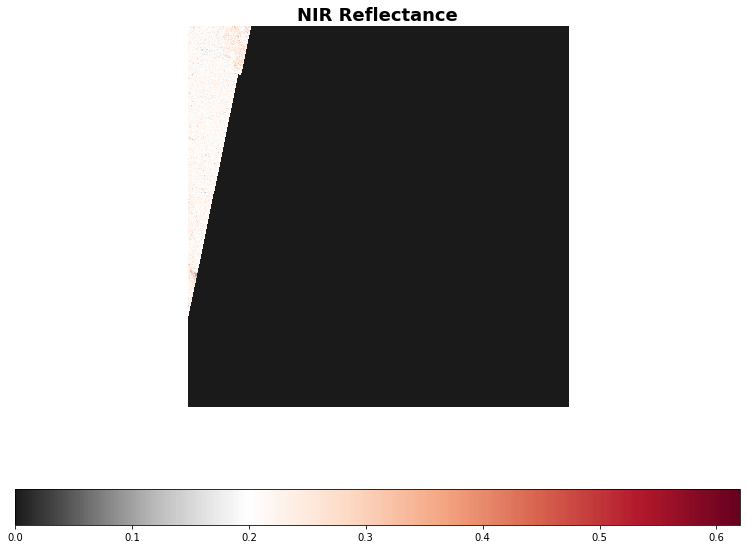

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


# Set min/max values from reflectance range for image (excluding NAN)
min=np.nanmin(band_nir_reflectance)
max=np.nanmax(band_nir_reflectance)
mid=0.20

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# diverging color scheme chosen from https://matplotlib.org/users/colormaps.html
# note that appending '_r' to the color scheme name reverses it!
cmap = plt.cm.get_cmap('RdGy_r')

cax = ax.imshow(band_nir_reflectance, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))

ax.axis('off')
ax.set_title('NIR Reflectance', fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

fig.savefig("ref-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

In [0]:
import rasterio
import numpy as np

for root, dirs, files in os.walk(SearchDirectory):
    for dirs in dirs:
        print(dirs)
        for files in files:
            #defining what files within each folder i'm looking at
            if file.endswith(("BGRN_Analytic.tif")):
                #print("Discovered this tif:", os.path.join(root, file))
                #print(file)
                tiffile = os.path.join(root, file)
    
            if file.endswith(("metadata.xml")):
                #print("Discovered this tif:", os.path.join(root, file))
                xmlfile = os.path.join(root, file)
                

        # using the files previously selected
        print("tif file is: ", tiffile)
        # Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
        with rasterio.open(tiffile) as src:
            band_blue_radiance = src.read(1)
            
        with rasterio.open(tiffile) as src:
            band_green_radiance = src.read(2)

        with rasterio.open(tiffile) as src:
            band_red_radiance = src.read(3)

        with rasterio.open(tiffile) as src:
            band_nir_radiance = src.read(4)
            
        print("xml file is: ", xmlfile)
        xmldoc = minidom.parse(xmlfile)
        nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

        # XML parser refers to bands by numbers 1-4
        coeffs = {}
        for node in nodes:
            bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
            if bn in ['1', '2', '3', '4']:
                i = int(bn)
                value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
                coeffs[i] = float(value)

        #print ("Conversion coefficients:", coeffs)

        # Multiply the Digital Number (DN) values in each band by the TOA reflectance coefficients
        band_blue_reflectance = band_blue_radiance * coeffs[1]
        band_green_reflectance = band_green_radiance * coeffs[2]
        band_red_reflectance = band_red_radiance * coeffs[3]
        band_nir_reflectance = band_nir_radiance * coeffs[4]

        import numpy as np
        #print ("Red band radiance is from {} to {}".format(np.amin(band_red_radiance), np.amax(band_red_radiance)))
        #print ("Red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))


        kwargs = src.meta
        kwargs.update(
            dtype=rasterio.uint16,
            count = 4)

        #print ("Before Scaling, red band reflectance is from {} to {}".format(np.amin(band_red_reflectance), np.amax(band_red_reflectance)))

        ## Here we include a fixed scaling factor. This is common practice.
        scale = 10000
        blue_ref_scaled = scale * band_blue_reflectance
        green_ref_scaled = scale * band_green_reflectance
        red_ref_scaled = scale * band_red_reflectance
        nir_ref_scaled = scale * band_nir_reflectance

        print ("After Scaling, red band reflectance is from {} to {}".format(np.amin(red_ref_scaled), np.amax(red_ref_scaled)))

        ## Write band calculations to a new raster file
        refl_file = os.path.join(root, dirs,  "reflectance.tif")
        print(refl_file)
        with rasterio.open('refl_file', 'w', **kwargs) as dst:
                dst.write_band(1, band_blue_reflectance.astype(rasterio.uint16))
                dst.write_band(2, band_green_reflectance.astype(rasterio.uint16))
                dst.write_band(3, band_red_reflectance.astype(rasterio.uint16))
                dst.write_band(4, band_nir_reflectance.astype(rasterio.uint16))
            

299857_3744205_2016-11-21_0e14
tif file is:  ['299857_3744307_2016-11-21_0e14_BGRN_Analytic.tif']


TypeError: ignored